In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import glob
#import os

%matplotlib inline

# prepare object points
nx = 9#TODO: enter the number of inside corners in x
ny = 6#TODO: enter the number of inside corners in y

original_images = []    # Store original calibration images
corner_images = []      # Store calibration images where corners were identified
fname_corner = []       # Store pathnames for images where corners were identified
nocorner_images = []    # Store images where no corners were identified
fname_nocorner = []     # Store pathnames for images where no corners were identified

objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ...., ...
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Make a list of calibration images
fname = glob.glob('./camera_cal/calibration*.jpg')
for i, path in enumerate(fname):
    #print(path)
    img = mpimg.imread(path)
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, draw corners
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        
        original_images.append(img)
        # Draw and display the corners
        img_pts = cv2.drawChessboardCorners(img.copy(), (nx, ny), corners, ret)
        #plt.imshow(img)
        corner_images.append(img_pts)
        fname_corner.append(path)
    else:
        original_images.append(img)
        nocorner_images.append(img)
        fname_nocorner.append(path)
        
        
#print(fname_corner)
print(fname_nocorner)

['./camera_cal/calibration5.jpg', './camera_cal/calibration4.jpg', './camera_cal/calibration1.jpg']


Calibration Images:


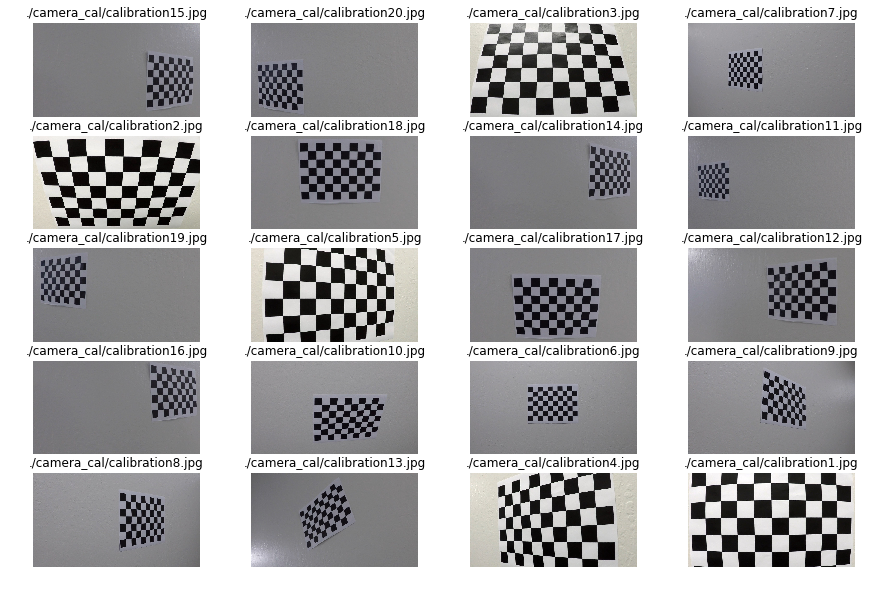

In [2]:
plt.figure(figsize=(15, 10))
gridspec.GridSpec(5, 4)

print('Calibration Images:')
for i, image, in enumerate(original_images):
    plt.subplot2grid((5, 4),(i//4, i%4),colspan=1, rowspan=1)
    plt.imshow(image)
    plt.title(fname[i])
    plt.axis('off')
plt.show()

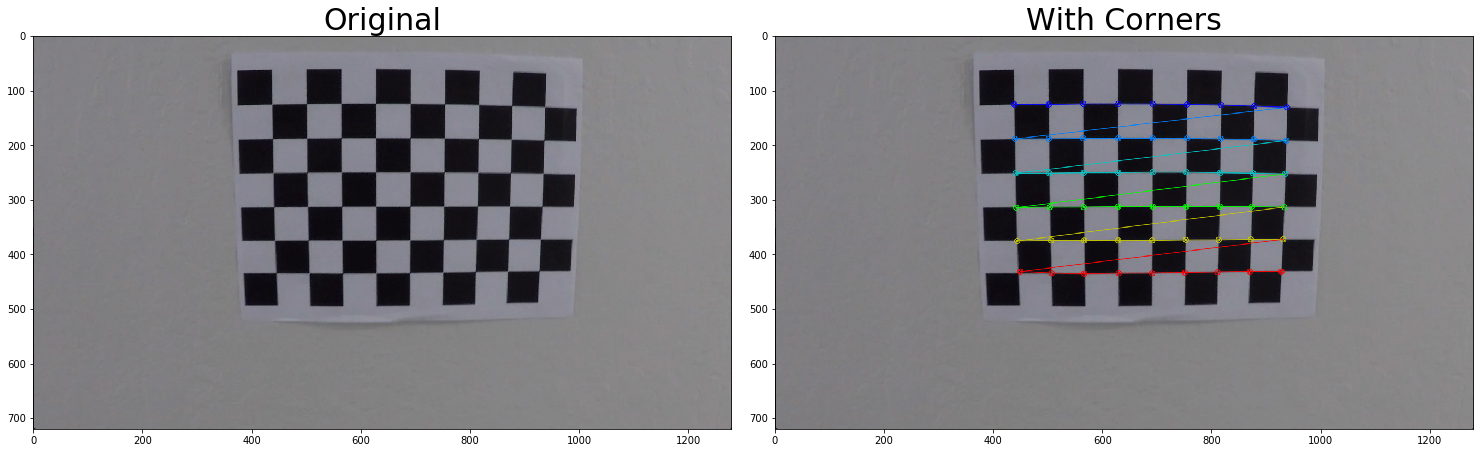

In [3]:
idx = 5
orig    = original_images[idx]
cor_img = corner_images[idx]
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
f.tight_layout()
ax1.imshow(orig)
ax1.set_title('Original', fontsize=30)
ax2.imshow(cor_img)
ax2.set_title('With Corners', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [4]:
gray = cv2.cvtColor(orig,cv2.COLOR_RGB2GRAY)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [5]:
undist = cv2.undistort(orig, mtx, dist, None, mtx)

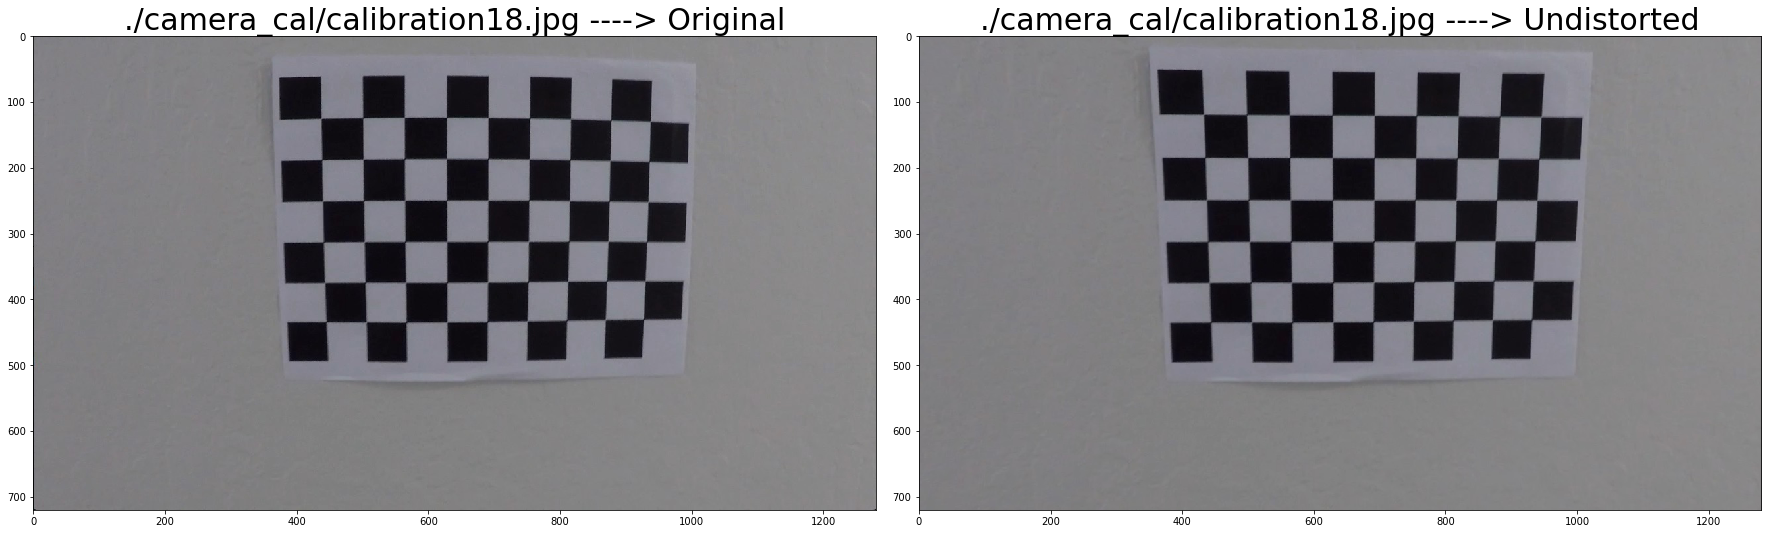

In [6]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
fig1.tight_layout()
ax1.imshow(orig)
ax1.set_title(fname[idx] + ' ----> Original', fontsize=30)
ax2.imshow(undist)
ax2.set_title(fname[idx] + ' ----> Undistorted', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
fig1.savefig('./output_images/Display_Images/camera_calib_example.jpg')

In [7]:
undist_all = []

for ii in range(20): # undistort and save all calibration images
    undist_all.append(cv2.undistort(original_images[ii], mtx, dist, None, mtx))
    mpimg.imsave('./output_images/Undistorted_Calibration_Images' + fname[ii][12:len(fname[ii])], undist_all[ii])

In [8]:
import pickle
pickle.dump({'mtx':mtx, 'dist':dist}, open('./data/camera_calib.p','wb')) # store data